<a href="https://colab.research.google.com/github/SinghTanmay024/House-Hold-Energy-Data/blob/main/HHED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pprint
from  sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data1 = pd.read_csv('/content/D202.csv')

In [ ]:
data1

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,10/24/2018,22:45,22:59,0.02,kWh,$0.00,NaN
70364,Electric usage,10/24/2018,23:00,23:14,0.03,kWh,$0.01,NaN
70365,Electric usage,10/24/2018,23:15,23:29,0.03,kWh,$0.01,NaN
70366,Electric usage,10/24/2018,23:30,23:44,0.03,kWh,$0.01,NaN


In [ ]:
data1.shape

(70368, 8)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   START TIME  70368 non-null  object 
 3   END TIME    70368 non-null  object 
 4   USAGE       70368 non-null  float64
 5   UNITS       70368 non-null  object 
 6   COST        70368 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 4.3+ MB


In [ ]:
data1 = data1.drop(["TYPE","UNITS","NOTES","START TIME","END TIME"], axis=1)

In [ ]:
data1["COST"] = data1["COST"].str.replace("$", "", regex=False).astype(float)

In [ ]:
data1

,DATE,USAGE,COST
0,10/22/2016,0.01,0.00
1,10/22/2016,0.01,0.00
2,10/22/2016,0.01,0.00
3,10/22/2016,0.01,0.00
4,10/22/2016,0.01,0.00
...,...,...,...
70363,10/24/2018,0.02,0.00
70364,10/24/2018,0.03,0.01
70365,10/24/2018,0.03,0.01
70366,10/24/2018,0.03,0.01


In [ ]:
print("first data point in time, START TIME: {}".format(data1["DATE"].min()))
print("last data point in time, START TIME: {}".format(data1["DATE"].max()))

first data point in time, START TIME: 1/1/2017
last data point in time, START TIME: 9/9/2018


In [ ]:
data1 = data1.set_index('DATE')
data1.index = pd.to_datetime(data1.index)

In [ ]:
data1

,USAGE,COST
DATE,,
2016-10-22,0.01,0.00
2016-10-22,0.01,0.00
2016-10-22,0.01,0.00
2016-10-22,0.01,0.00
2016-10-22,0.01,0.00
...,...,...
2018-10-24,0.02,0.00
2018-10-24,0.03,0.01
2018-10-24,0.03,0.01


In [ ]:
data1 = data1[['USAGE','COST']]

In [ ]:
data1 = data1.resample('d').sum()

In [ ]:
data1

,USAGE,COST
DATE,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84
...,...,...
2018-10-20,8.00,1.68
2018-10-21,1.12,0.16
2018-10-22,0.64,0.04


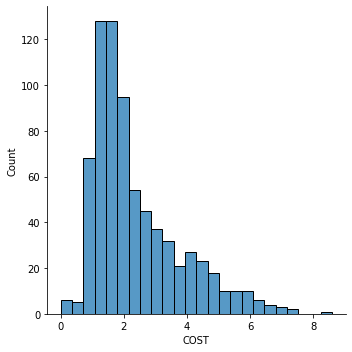

In [ ]:
sns.displot(data1.COST)
plt.show()

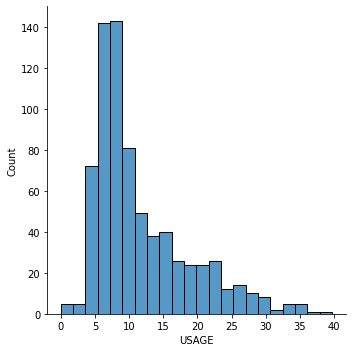

In [ ]:
sns.displot(data1.USAGE)
plt.show()

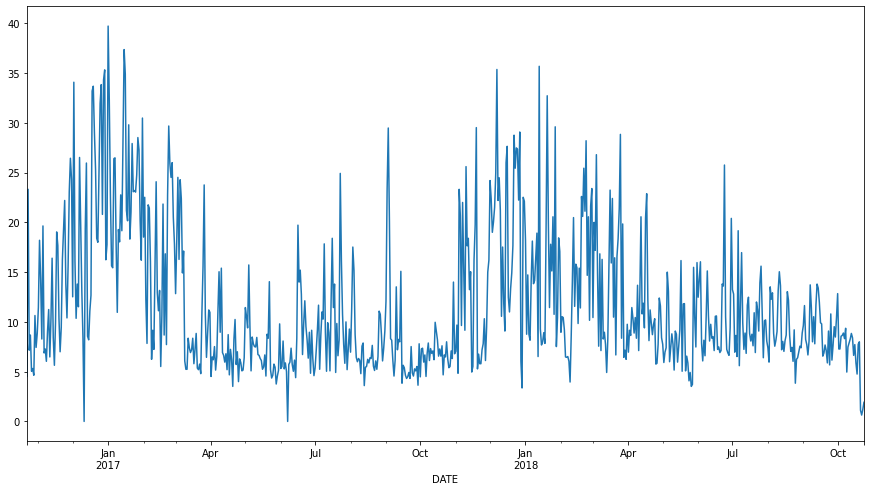

In [ ]:
data1["USAGE"].plot(figsize=(15, 8))

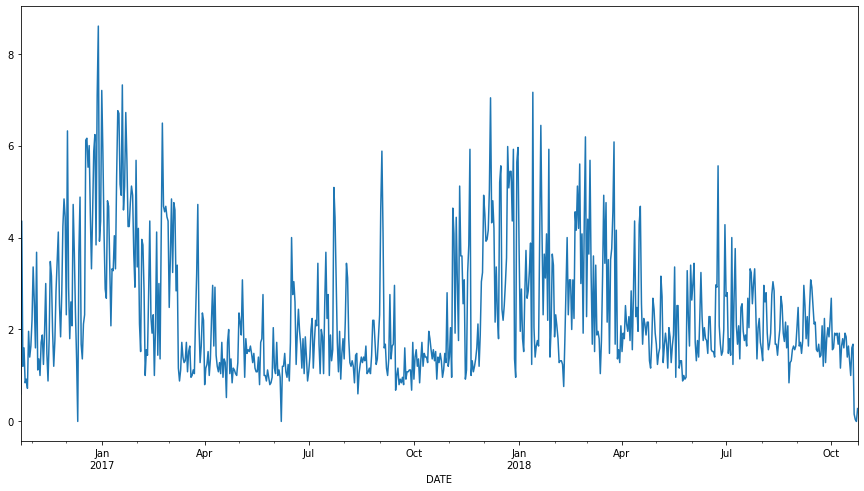

In [ ]:
data1["COST"].plot(figsize=(15, 8))

# **yearly wise seeing which year consumption was high**

In [ ]:
data1 = data1.resample('Y').sum()

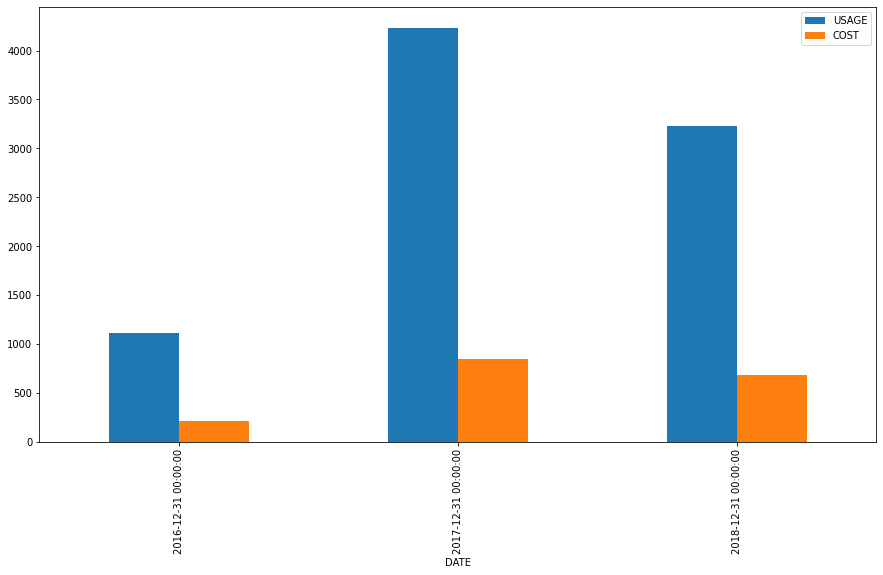

In [ ]:
data1.plot(kind="bar",figsize=(15, 8))